In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

### Config

In [24]:
data_input_dir_str = "./Data/Raw/SageWrite_corpus_0.1_origin.csv"
data_output_dir_str = "./Data/Preprocessed/preprocessed.csv"

outline_columns_lst = ["outline_1", "outline_2", "outline_3"]

colnames_change_dict = {outline_columns_lst[0]: 'outline',
                   outline_columns_lst[1]: 'outline',
                   outline_columns_lst[2]: 'outline'}

name_replacement_dict = {1: 0, 2: 1, 3:1} 

In [25]:
def drop_and_rename(dat, col_name1, col_name2):
    
    dat  = dat.drop([col_name1, col_name2], axis = 1)
    
    return dat.rename(columns=colnames_change_dict)

In [26]:
data = pd.read_csv(data_input_dir_str)
#data = data.replace(name_replacement)

In [27]:
data.columns

Index(['sb_summary_id', 'original_text_id', 'original_text', 'outline_1',
       'outline_2', 'outline_3', 'colloquial_language', 'formal_language',
       'unnecessary_jargon', 'verbosity', 'opaque_writing',
       'overly_long_sentences', 'excessively_complex_syntax',
       'abuse_of_passive_sentences', 'clear_structure', 'pretentiousness',
       'engaging_writing', 'dull_writing', 'unclear', 'word_choice',
       'repetition', 'fragment', 'non_sequitor', 'poor_flow', 'redundant'],
      dtype='object')

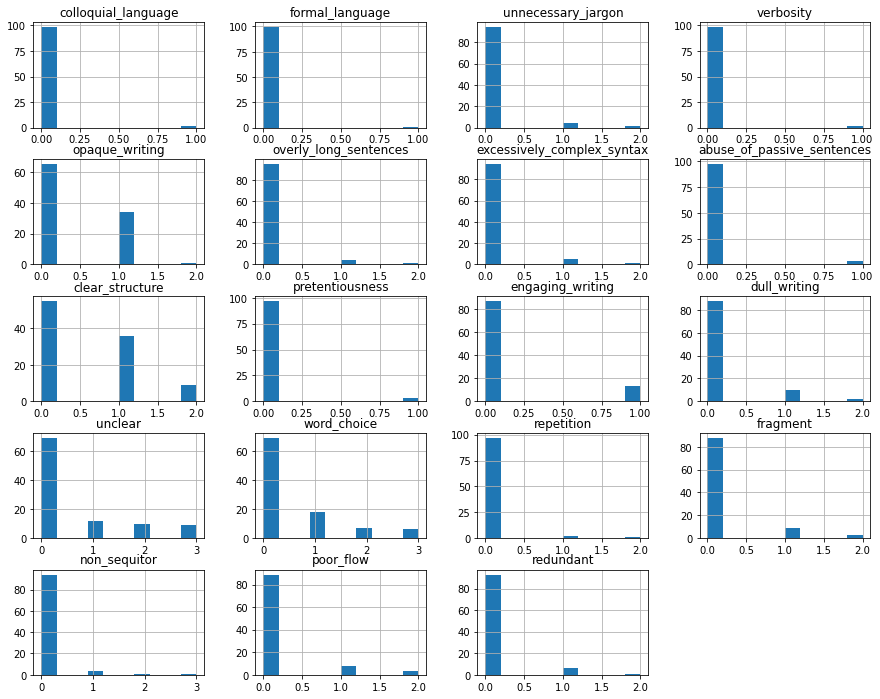

In [28]:
plot = data.drop(['sb_summary_id', 'original_text_id', 'original_text', 'outline_1',
       'outline_2', 'outline_3'], axis = 1).hist(figsize=(15, 12))

In [29]:
data_lst = [
    drop_and_rename(data,outline_columns_lst[0],outline_columns_lst[1]),
    drop_and_rename(data,outline_columns_lst[0],outline_columns_lst[2]),
    drop_and_rename(data,outline_columns_lst[1],outline_columns_lst[2])
            ]
data = pd.concat(data_lst)
len(data[data.sb_summary_id==1])

3

In [44]:
#data[0:1]
data.reset_index(drop=True).to_csv(data_output_dir_str, index=False)